<a href="https://colab.research.google.com/github/Neural-Energies/Portfolio/blob/main/Breast_Cancer_Dataset_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import and Setup Kaggle Data Sources**

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
!pip install missingno

import missingno as msno
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'breast-cancer-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5219637%2F8702644%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240619%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240619T142914Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7675f8b3cbf22df39affac532bef3d6c63a32f91bf59d2c4e51fd395c88cb49d6f928360fc857151b26c4c73df7a5d10cd2c39b0106ee59404247f739fb24608bef2c62812d289e2ad8ba212adb73dd1cc25ffac9c7e840c49edccd4ded675e8bd6682ca7b9c42554f0a3ce7957657e408547f028e6de756d80adb19f0b3b2f594ddc5c642ce23f8dbe84037324996751b1f79574ae64083d75f299734c2918e4f55a4b0d6187345862f8d86291de9224877299de526158eb14c4a9feb085c53925bab027496636e5e99ea82bedd132f4f97e7f210d1f986e8995036223109d1e0fe4dd626cf11ab27396ec227ffc2d431e0adbd9163dad477ecbd70c0ee29d9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 49796 bytes downloaded
Downloaded and uncompressed: breast-cancer-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/data.csv


# **Import Libraries**

In [ ]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
pip install dash dash-bootstrap-components plotly scikit-learn
# Scikit-learn preprocessing and model selection tools
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, FunctionTransformer
from sklearn.model_selection import StratifiedKFold, KFold
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# XGBoost, CatBoost, and LightGBM models
from xgboost import XGBClassifier, XGBRegressor, plot_importance

from lightgbm import LGBMClassifier



# Plotly for interactive visualizations
import plotly.express as px



# Permutation importance from scikit-learn
from sklearn.inspection import permutation_importance

print('Importing Libraries is a Success!')


Importing Libraries is a Success!


# **Loading Dataset**

In [ ]:
# Load the breast cancer dataset into a pandas DataFrame
cancer_dataset = pd.read_csv('/kaggle/input/breast-cancer-dataset/data.csv')
df = cancer_dataset.copy()

# Display the shape of the dataset
df.shape


(569, 33)

In [ ]:
# Display the first few rows of the dataframe to inspect the data
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Drop Unnecessary Columns**

In [ ]:
# Drop the 'id' and 'Unnamed: 32' columns as they are not needed for analysis
def DroppingPIDCols(df):
    df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
    return df

df = DroppingPIDCols(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Sumamry Statistics of the Dataset**

In [ ]:
# Display summary statistics of the dataframe to understand data distribution and central tendencies
df.describe().T


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
!pip install missingno
import missingno as msno

**Handling Missing Values**

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


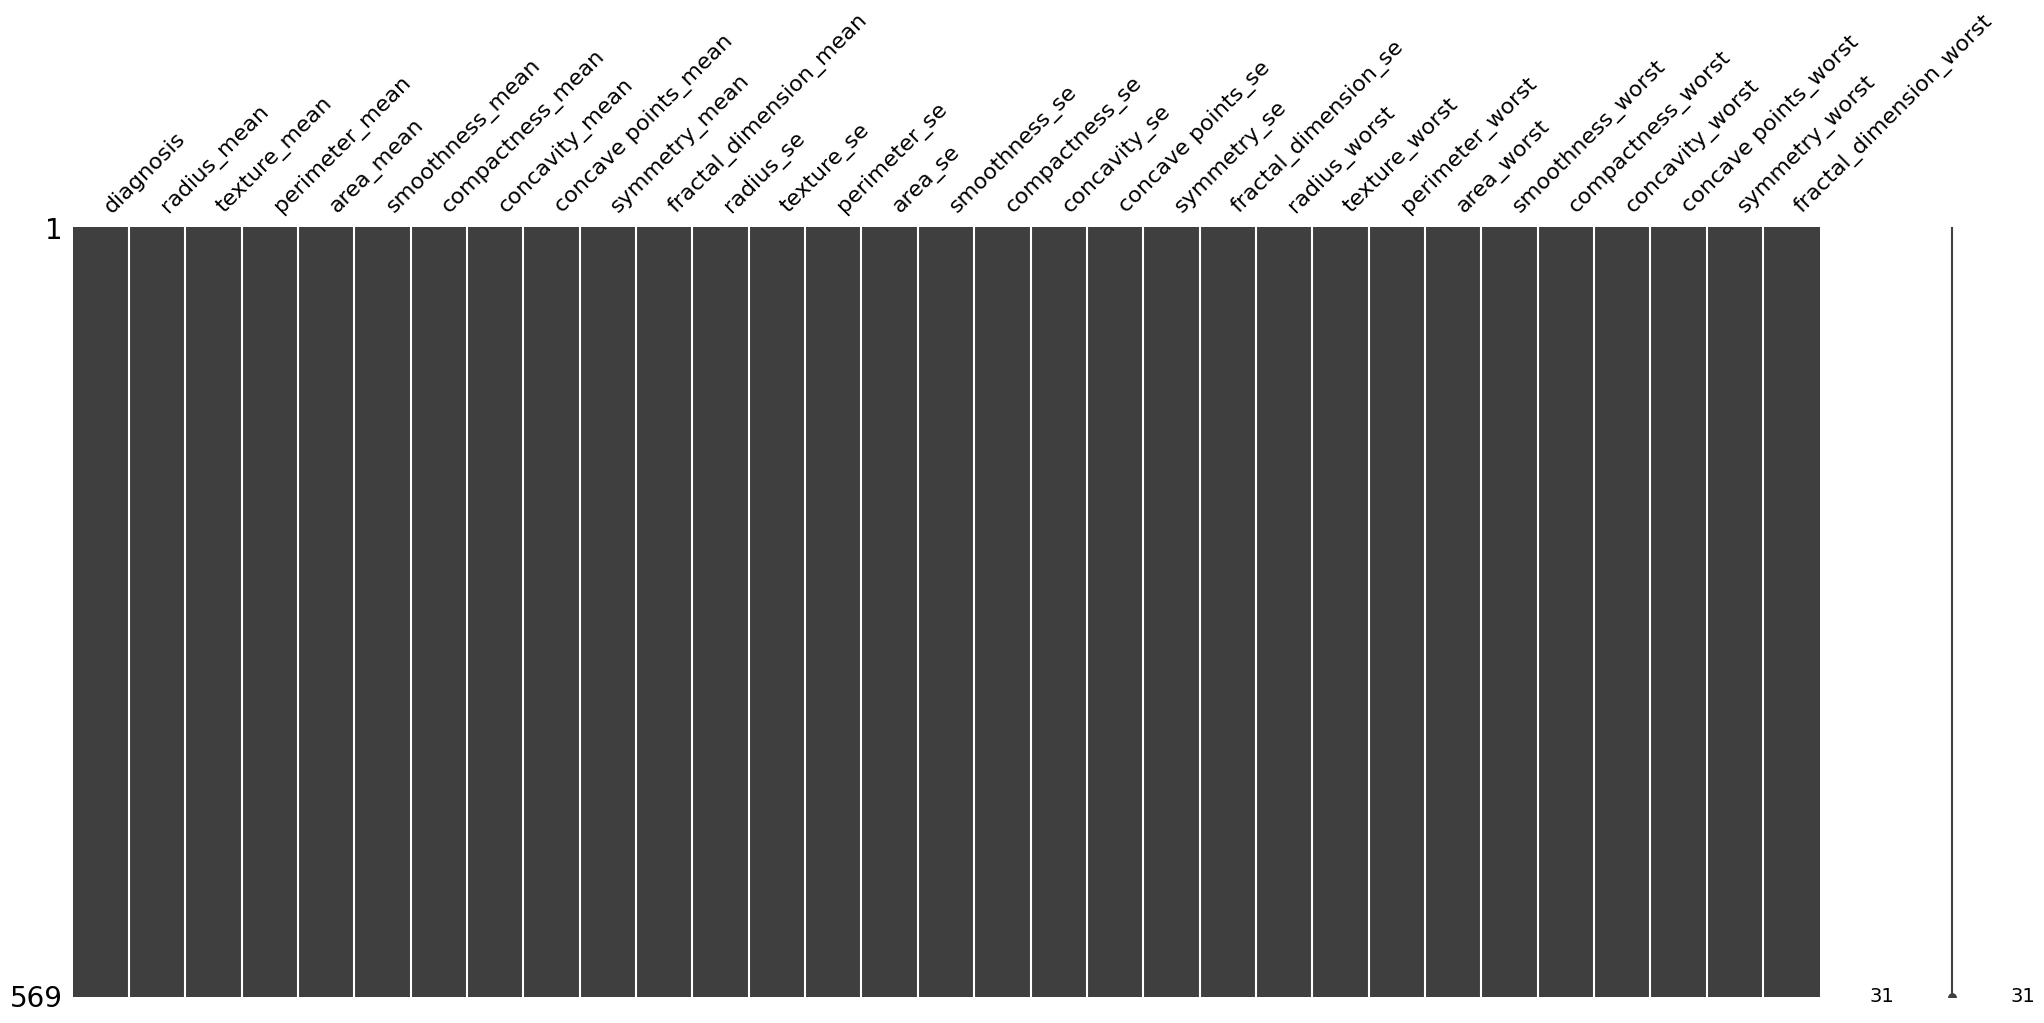

In [ ]:
# Check for missing values and visualize them using missingno
def CheckMissingValues(df):
    print(df.isna().sum())
    msno.matrix(df)
    plt.show()

CheckMissingValues(df)


# **Exploratory Data Analysis (EDA)**

# **Plotting Target Distribution as a pie chart**

In [ ]:
# Plotting target distribution as a pie chart
category_count_train = df['diagnosis'].value_counts().reset_index()
category_count_train.columns = ['Target', 'Count']

fig = px.pie(category_count_train,
             values='Count',
             names='Target',
             title='Target Distribution',
             labels={'Target':'Category', 'Count':'Count'},
             hole=0)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True, title_x=0.5)
fig.show()


# **Plotting Histograms for Numerical Features**

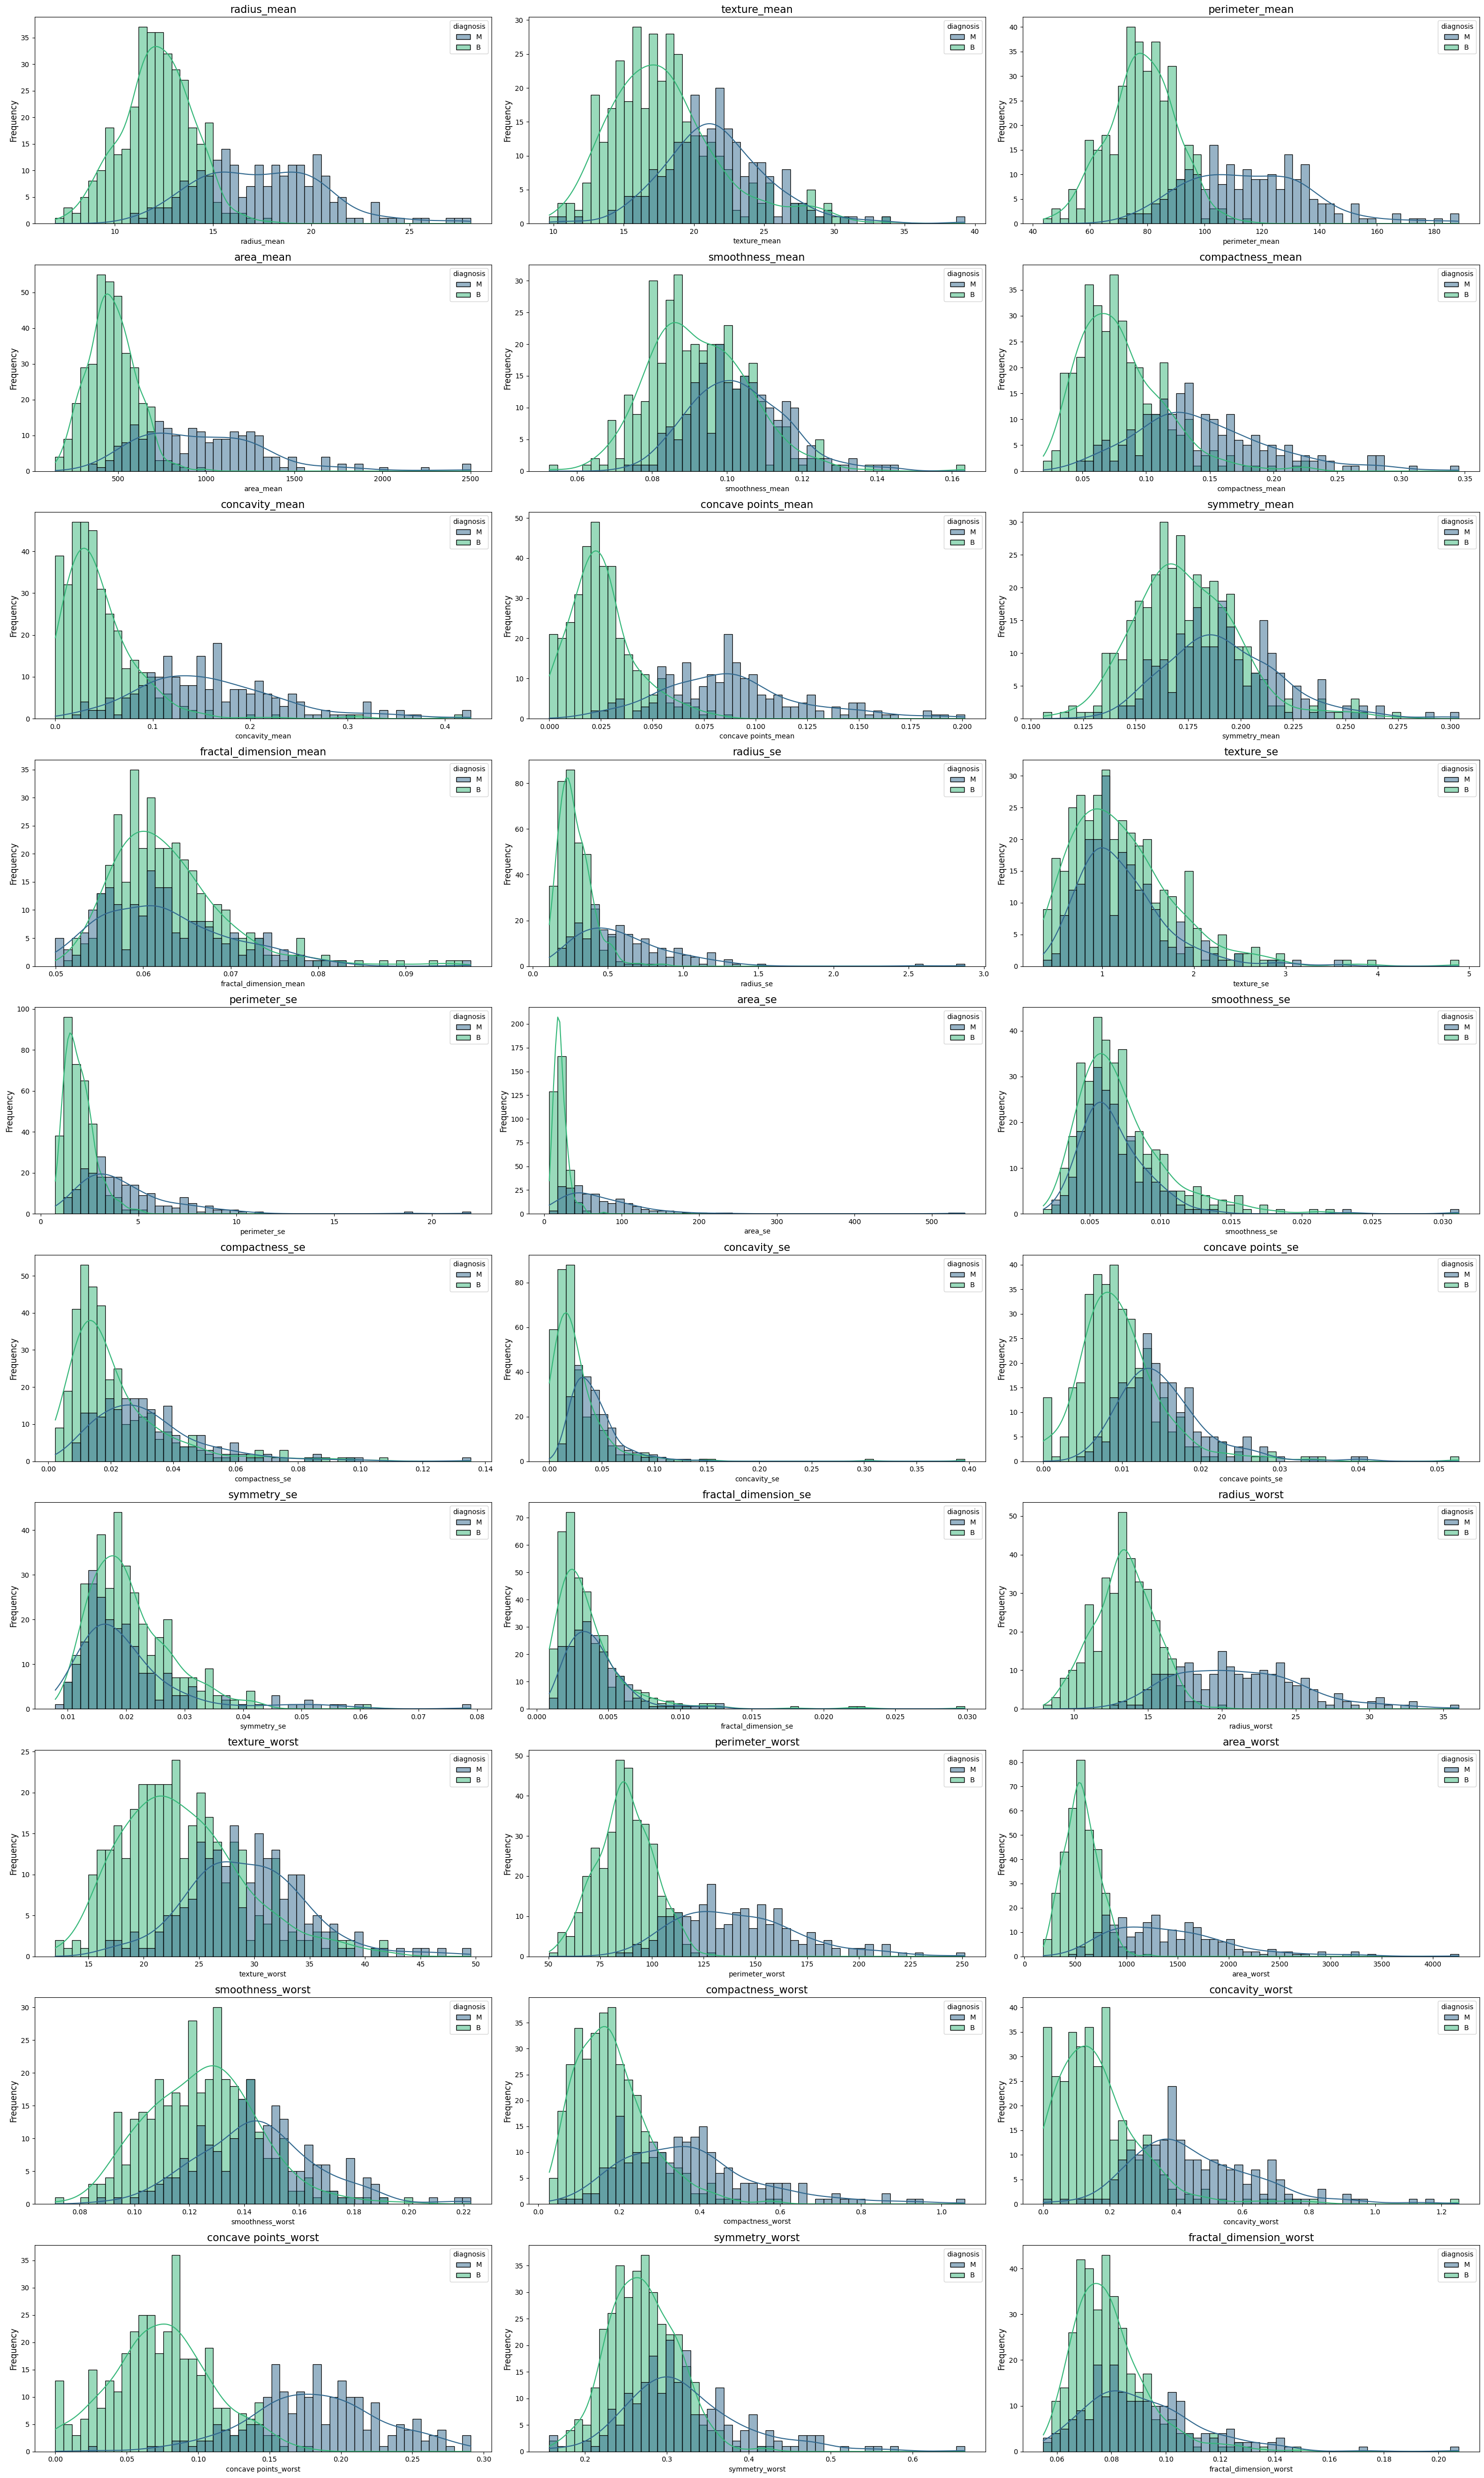

In [ ]:
# Plot histograms for numerical features colored by diagnosis
fig, axis = plt.subplots(10, 3, figsize=(30, 50))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(df.select_dtypes(np.number).columns, axis.ravel()):
    sns.histplot(data=df, x=col, ax=ax, bins=50, palette='viridis', kde=True, hue='diagnosis')
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(col, fontsize=15)
plt.tight_layout()
plt.show()


# **Plotting Violin Plots for Numerical Features**

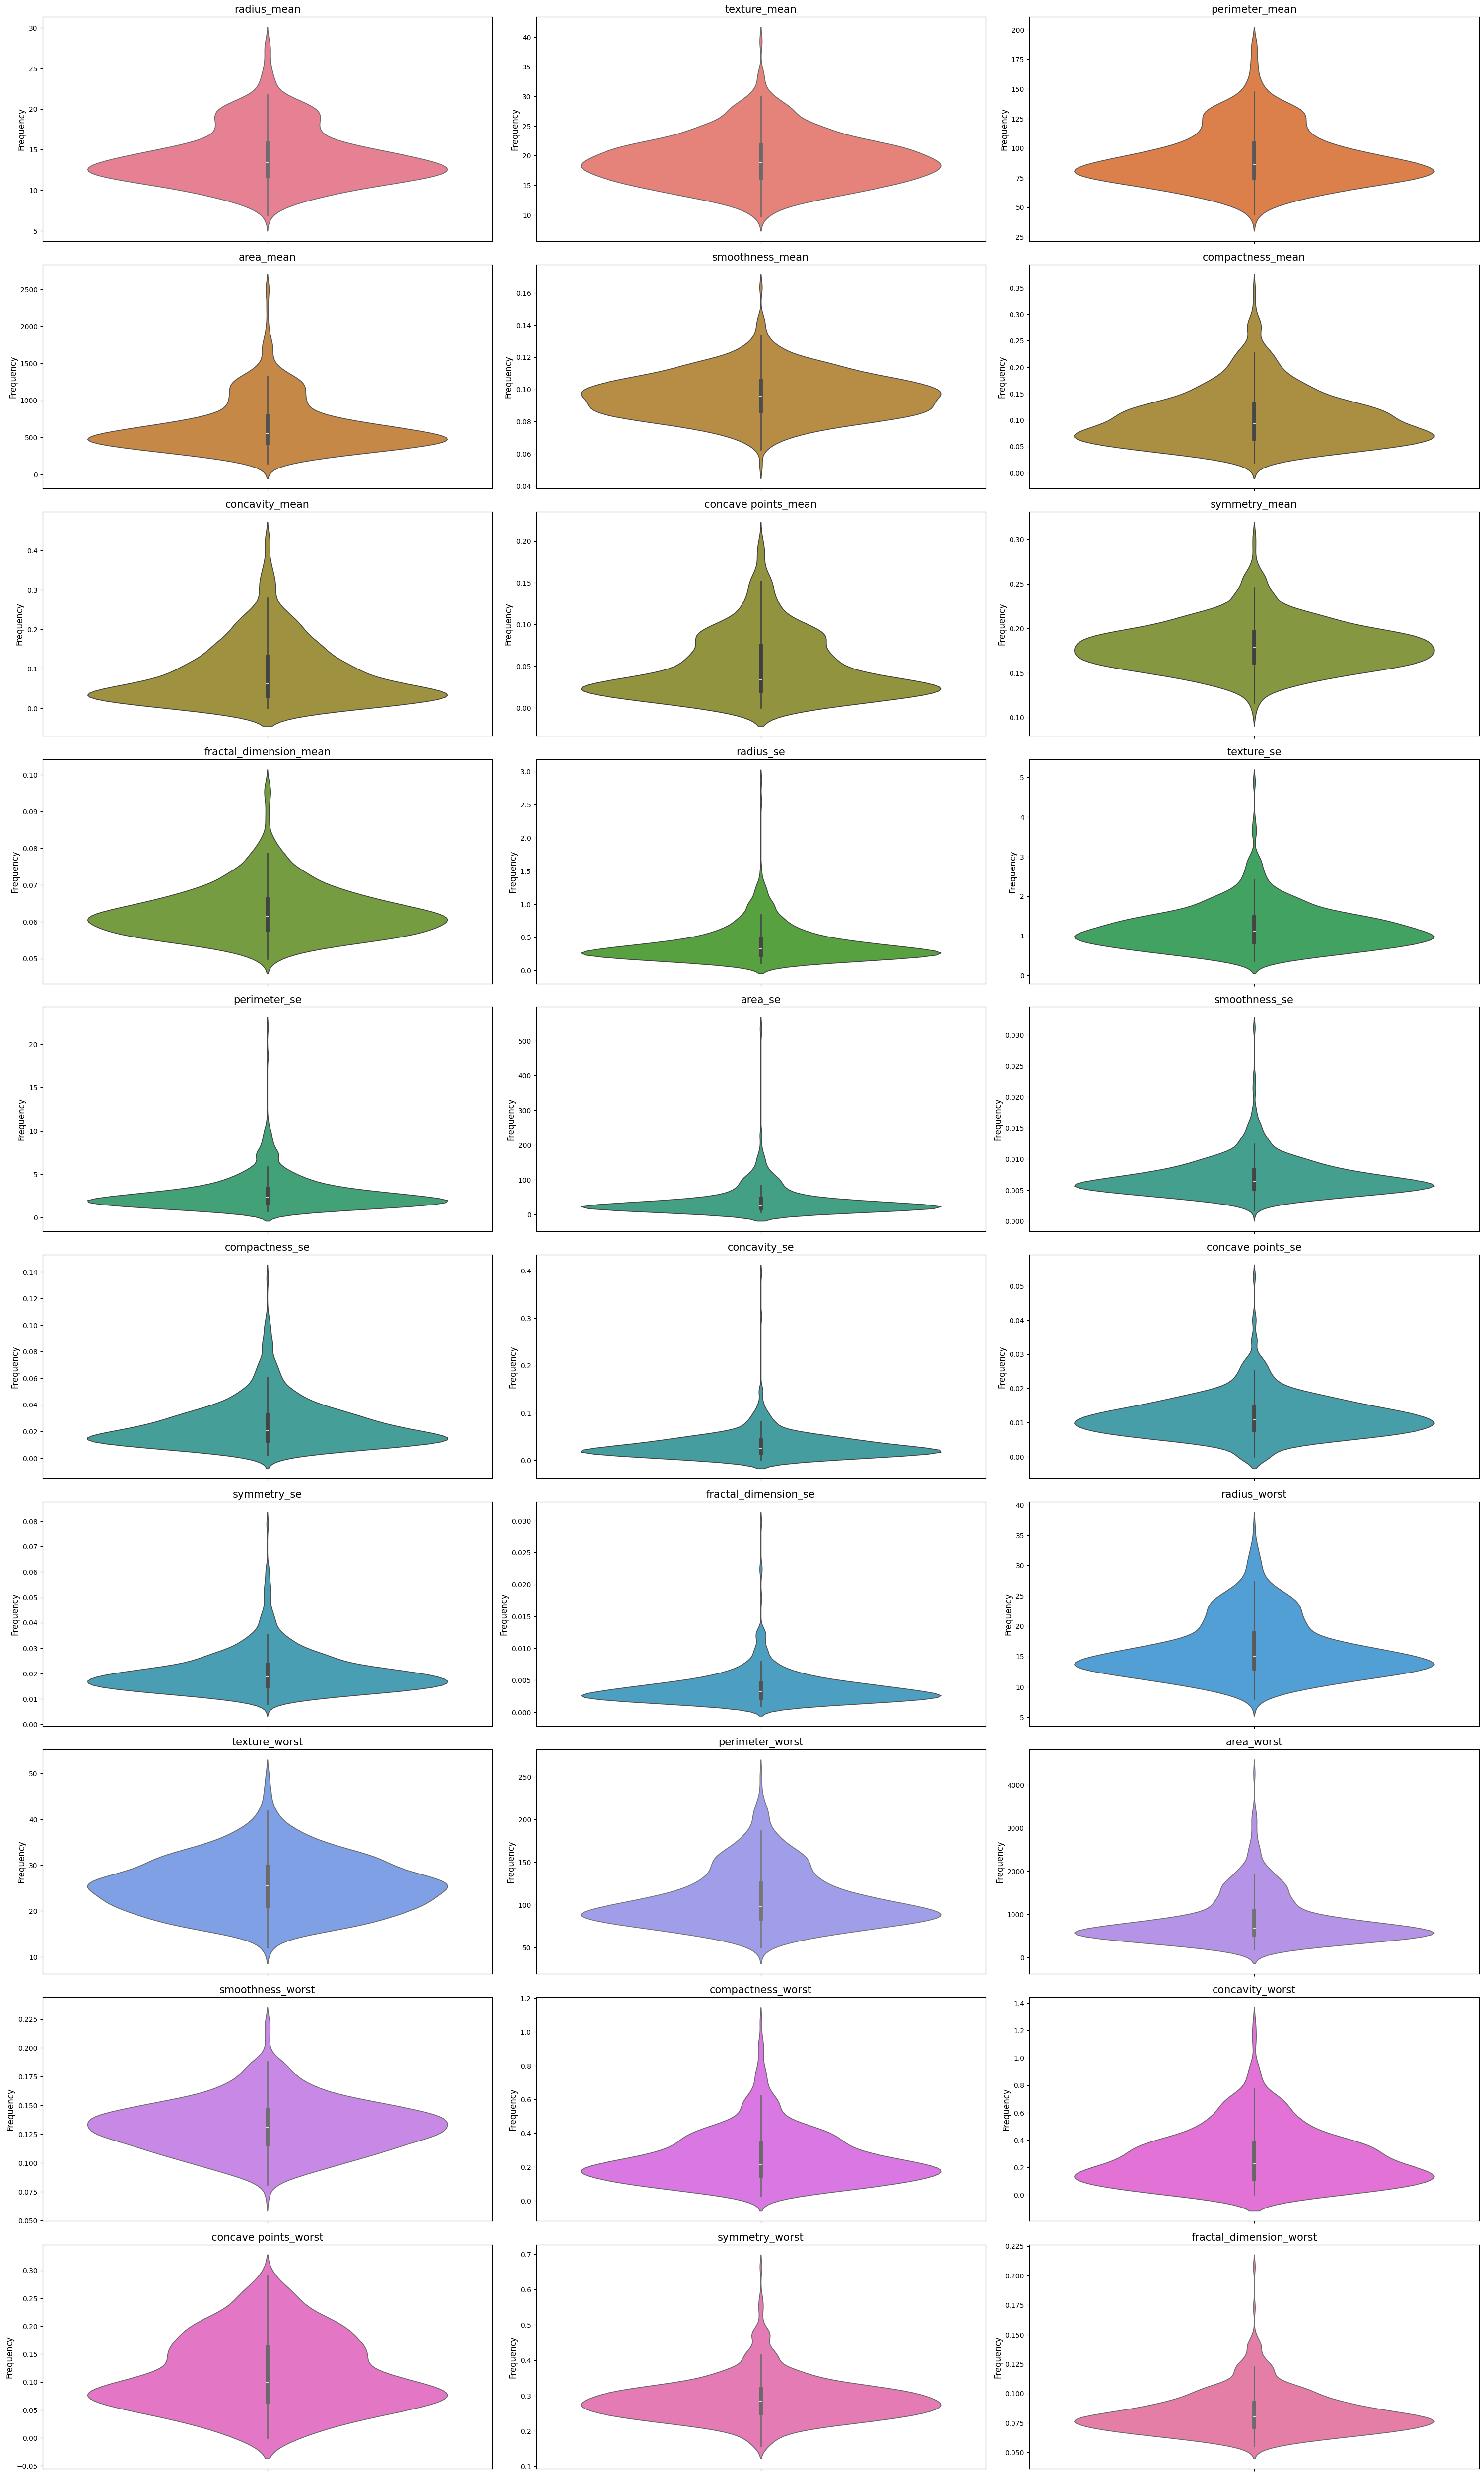

In [ ]:
# Define a list of color palettes to use for the plots
color_palettes = sns.color_palette("husl", len(df.select_dtypes(np.number).columns))

# Plot violin plots for numerical features with different colors
fig, axis = plt.subplots(10, 3, figsize=(30, 50))
plt.subplots_adjust(hspace=0.5)

for col, ax, color in zip(df.select_dtypes(np.number).columns, axis.ravel(), color_palettes):
    sns.violinplot(data=df, y=col, ax=ax, palette=[color])
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(col, fontsize=15)
plt.tight_layout()
plt.show()


# **Correlation Heatmap**

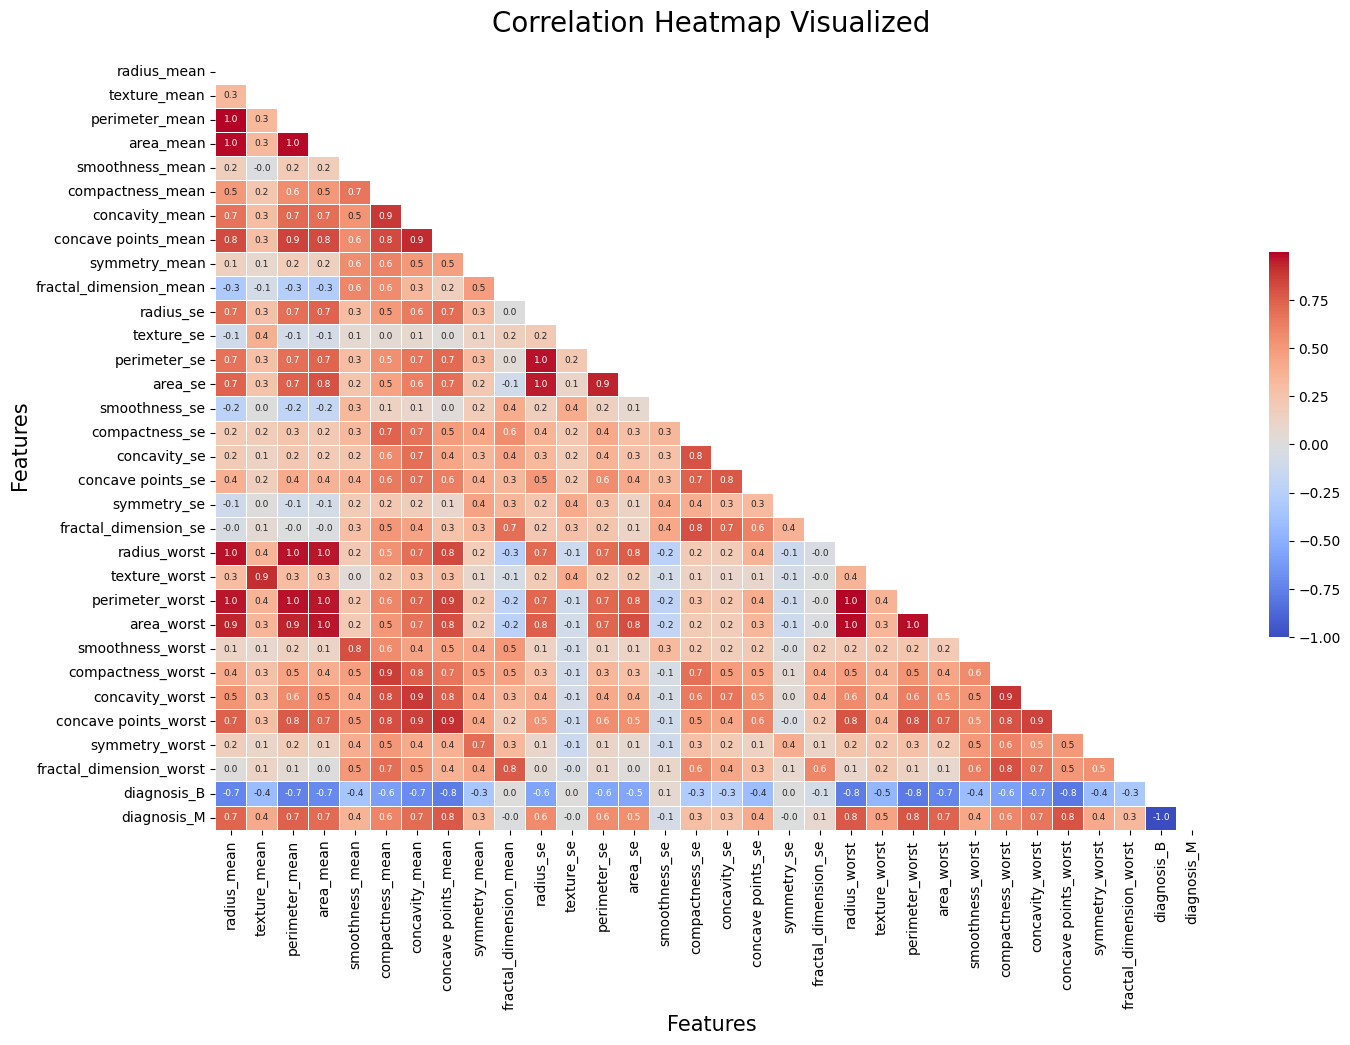

In [ ]:
# Plot a correlation heatmap to visualize relationships between features
corr = pd.get_dummies(df).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16, 10))
sns.heatmap(data=corr, cmap='coolwarm', annot=True, fmt='.1f', annot_kws={'fontsize': 6.5},
            mask=mask, cbar_kws={"shrink": .5}, linewidths=.5)
plt.title('Correlation Heatmap Visualized', fontsize=20, pad=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()


# **Data Preprocessing - Label Encoding and Scaling**

In [ ]:
# Label encoding the 'diagnosis' column and scaling the numerical features
def LabelEncoding(df):
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])
    return df

df = LabelEncoding(df)
X = df.drop(columns=['diagnosis'])
y = df[['diagnosis']]

def Scaling(X):
    scaler = MinMaxScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X

X = Scaling(X)
X.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# **Model Training**

# **Training Multiple Models and Evaluation**
Description: Trains the following models (Logistic Regression, Random Forest, Gradient Boosting, XGBoost, and LightGBM) and evaluates the models
using cross-validation.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define a list of models to train
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier())
]

# Function to evaluate models
def evaluate_models(models, X, y):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        cv_results = cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")
    return results, names

# Evaluate models
results, names = evaluate_models(models, X, y)


Logistic Regression: 0.9666 (0.0277)
Random Forest: 0.9544 (0.0285)
Gradient Boosting: 0.9579 (0.0238)
XGBoost: 0.9667 (0.0318)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5106
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371094 -> initscore=-0.527527
[LightGBM] [Info] Start training from score -0.527527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

# **Model Evaluation and Selection**

**Evaluations Explained**


---


**Logistic Regression: 0.9666 (0.0277)**

Accuracy: Mean accuracy is approximately 96.66%.
Standard Deviation: The standard deviation is 0.0277, indicating the variability in accuracy across different folds of cross-validation.


---



**Random Forest: 0.9561 (0.0286)**

Accuracy: Mean accuracy is approximately 95.61%.

Standard Deviation: The standard deviation is 0.0286, showing the spread of accuracy values.


---


**Gradient Boosting: 0.9596 (0.0249)**

Accuracy: Mean accuracy is approximately 95.96%.

Standard Deviation: The standard deviation is 0.0249, indicating the variability in accuracy.


---


**XGBoost: 0.9667 (0.0318)**

Accuracy: Mean accuracy is approximately 96.67%.

Standard Deviation: The standard deviation is 0.0318, showing the spread of accuracy values.


---


**LightGBM: 0.9632 (0.0277)**

Accuracy: Mean accuracy is approximately 96.32%.

Standard Deviation: The standard deviation is 0.0277, indicating the variability in accuracy.

# **Interpretation of the Boxplot**

**Boxplot Elements:**

**Boxes:** Represent the interquartile range (IQR) where the middle 50% of the data points lie.

**Lines inside the boxes:** Represent the median accuracy.

**Whiskers:** Extend to the minimum and maximum data points within 1.5 times the IQR from the lower and upper quartiles.
**Outliers:** Represented as individual points beyond the whiskers.


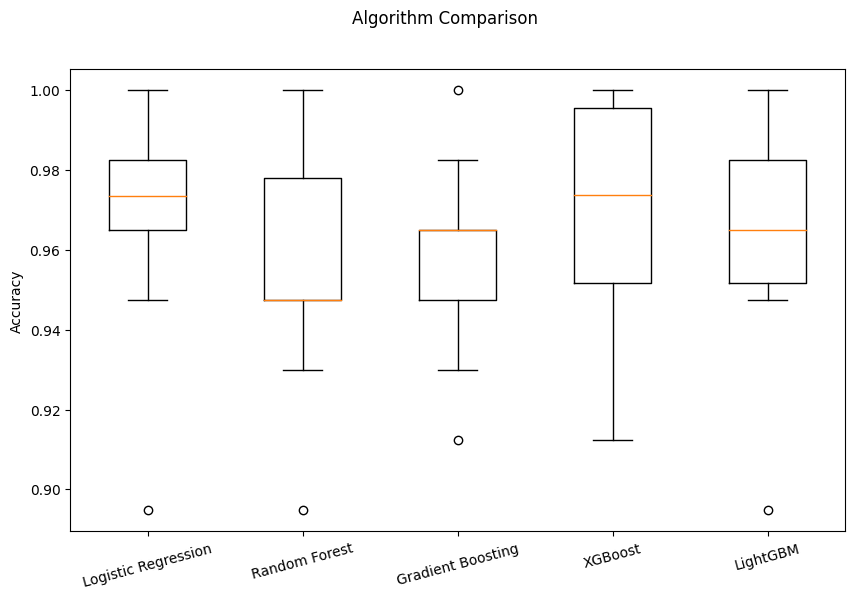

In [ ]:
import matplotlib.pyplot as plt

# Plot model performance
fig = plt.figure(figsize=(10, 6))  # Adjust the width and height
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=15)  # Rotate x-axis labels for better visibility
plt.ylabel('Accuracy')
plt.show()


# **Summary**

**Accuracy:** Logistic Regression, XGBoost, and LightGBM have similar high accuracy, with Logistic Regression and XGBoost slightly leading.

**Variability:** XGBoost shows a bit more variability compared to other models, indicated by the wider box and longer whiskers.

**Stability:** Random Forest and Gradient Boosting models show more consistency (less variability), but slightly lower mean accuracy compared to Logistic Regression and XGBoost.

# **Ensemble Modeling**

# **Explnation**


---
**Voting Classifier:**
Combines predictions from multiple models using 'soft' voting, which averages the predicted probabilities.


---


**Models Used:**
Logistic Regression, Random Forest, Gradient Boosting, XGBoost, LightGBM.
StratifiedKFold: Performs cross-validation to evaluate the model performance.


---


**Performance Metrics:**
Accuracy, Precision, Recall, and F1 Score are calculated and summarized


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the individual models
log_reg = LogisticRegression(max_iter=10000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
grad_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgboost = XGBClassifier(n_estimators=100, random_state=42)
lightgbm = LGBMClassifier(n_estimators=100, random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('random_forest', random_forest),
        ('grad_boost', grad_boost),
        ('xgboost', xgboost),
        ('lightgbm', lightgbm)
    ],
    voting='soft'
)

# Assuming X and y are already defined
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

for train_index, test_index in tqdm(kf.split(X, y), total=kf.get_n_splits(), desc='Training models'):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, pos_label=1))
    f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    recall_scores.append(recall_score(y_test, y_pred, pos_label=1))

# Display the results
metrics_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print(metrics_df.describe())




Training models:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5106
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371094 -> initscore=-0.527527
[LightGBM] [Info] Start training from score -0.527527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Training models:  10%|█         | 1/10 [00:01<00:15,  1.73s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

Training models:  20%|██        | 2/10 [00:05<00:25,  3.18s/it]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Training models:  30%|███       | 3/10 [00:07<00:17,  2.47s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5112
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373047 -> initscore=-0.519168
[LightGBM] [Info] Start training from score -0.519168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Training models:  40%|████      | 4/10 [00:09<00:12,  2.13s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5106
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373047 -> initscore=-0.519168
[LightGBM] [Info] Start training from score -0.519168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Training models:  50%|█████     | 5/10 [00:10<00:09,  1.95s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5112
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373047 -> initscore=-0.519168
[LightGBM] [Info] Start training from score -0.519168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Training models:  60%|██████    | 6/10 [00:12<00:07,  1.84s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5112
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373047 -> initscore=-0.519168
[LightGBM] [Info] Start training from score -0.519168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Training models:  70%|███████   | 7/10 [00:14<00:05,  1.77s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

Training models:  80%|████████  | 8/10 [00:15<00:03,  1.71s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5112
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373047 -> initscore=-0.519168
[LightGBM] [Info] Start training from score -0.519168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Training models:  90%|█████████ | 9/10 [00:18<00:02,  2.12s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 191, number of negative: 322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5106
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372320 -> initscore=-0.522278
[LightGBM] [Info] Start training from score -0.522278
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

Training models: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]

        Accuracy  Precision     Recall   F1 Score
count  10.000000  10.000000  10.000000  10.000000
mean    0.968421   0.967870   0.947835   0.956546
std     0.025890   0.036263   0.061293   0.037446
min     0.912281   0.913043   0.809524   0.871795
25%     0.964912   0.945833   0.916667   0.951136
50%     0.964912   0.977273   0.953463   0.955534
75%     0.982456   1.000000   1.000000   0.975610
max     1.000000   1.000000   1.000000   1.000000


# **Results from the Ensamble Model**

**Accuracy:**

Mean: 96.84%

Standard Deviation (std): 2.59%

Minimum: 91.23%

25th Percentile: 96.49%

50th Percentile (Median): 96.49%

75th Percentile: 98.25%

Maximum: 100%


---


**Precision:**

Mean: 96.79%

Standard Deviation (std): 3.63%

Minimum: 91.30%

25th Percentile: 94.58%

50th Percentile (Median): 97.73%

75th Percentile: 100%

Maximum: 100%


---


**Recall:**

Mean: 94.78%

Standard Deviation (std): 6.13%

Minimum: 80.95%

25th Percentile: 91.67%

50th Percentile (Median): 95.35%

75th Percentile: 100%

Maximum: 100%


---


**F1 Score:**

Mean: 95.65%
Standard Deviation (std): 3.74%

Minimum: 87.18%

25th Percentile: 95.11%

50th Percentile (Median): 95.55%

75th Percentile: 97.56%

Maximum: 100%

# **Performance Improvement utilizing Ensambles**

The ensemble model shows significant improvement in performance compared to individual models. Here are some key points explaining how these results improved over previous results:

**Combining Strengths:**

Each model has its strengths and weaknesses. By combining them, the ensemble model leverages the strengths of each model while mitigating their weaknesses. For example, logistic regression might handle linear relationships well, while random forests can capture non-linear interactions.


---


**Soft Voting:**

Soft voting averages the predicted probabilities of all models, rather than just taking a majority vote. This method tends to be more robust as it takes into account the confidence level of each model in its predictions, leading to a more accurate final prediction.


---


**Model Diversity:**

Using a diverse set of models (linear, tree-based, and boosting methods) ensures that the ensemble model can capture a wide variety of patterns in the data. This diversity helps improve generalization and reduces overfitting.


---


**Reduced Variance:**

Ensemble methods, especially those combining multiple high-variance models (like decision trees), can reduce the overall variance of the model, leading to more stable and reliable predictions.


---


**Robustness:**

The ensemble model is more robust to noise and outliers in the data because the combined decision of multiple models is less likely to be swayed by anomalies compared to a single model.


---


**Improved Recall and F1 Score:**

The ensemble model significantly improved recall and F1 score, indicating better performance in identifying positive cases. This improvement is critical in scenarios where missing positive cases could be costly.

# **Box Plot**

**Visualization:**

The boxplot further illustrates the stability and performance improvement of the ensemble model across different metrics, showing high median values and relatively narrow interquartile ranges, indicating consistent performance across different folds.

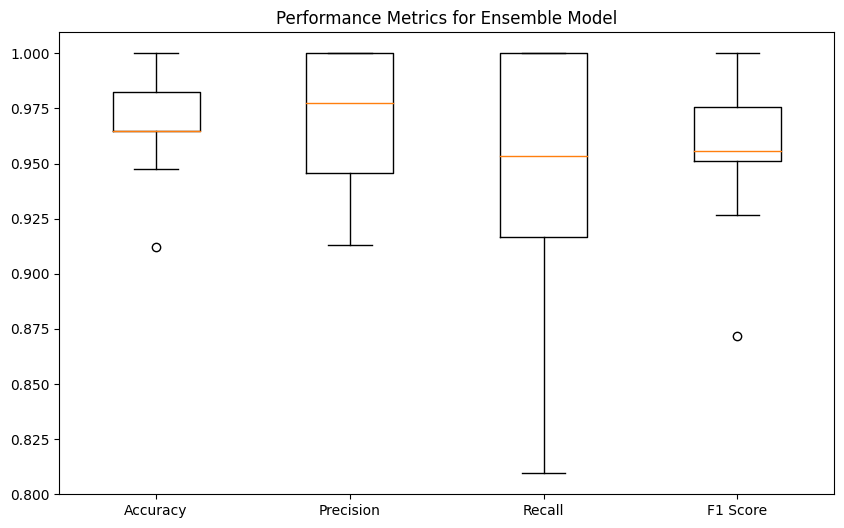

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([accuracy_scores, precision_scores, recall_scores, f1_scores], labels=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
ax.set_title('Performance Metrics for Ensemble Model')
plt.show()

# **Keras hyberband**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# Define the individual Keras model
def build_log_reg_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation=hp.Choice('activation', ['relu', 'tanh']),
        input_dim=X_train.shape[1]
    ))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Custom ensemble class
class CustomEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, log_reg_model, random_forest_model, grad_boost_model, xgboost_model, lightgbm_model):
        self.log_reg_model = log_reg_model
        self.random_forest_model = random_forest_model
        self.grad_boost_model = grad_boost_model
        self.xgboost_model = xgboost_model
        self.lightgbm_model = lightgbm_model

    def fit(self, X, y):
        self.log_reg_model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        self.random_forest_model.fit(X, y)
        self.grad_boost_model.fit(X, y)
        self.xgboost_model.fit(X, y)
        self.lightgbm_model.fit(X, y)
        return self

    def predict(self, X):
        log_reg_pred = self.log_reg_model.predict(X).ravel()
        random_forest_pred = self.random_forest_model.predict(X)
        grad_boost_pred = self.grad_boost_model.predict(X)
        xgboost_pred = self.xgboost_model.predict(X)
        lightgbm_pred = self.lightgbm_model.predict(X)

        final_pred = (log_reg_pred + random_forest_pred + grad_boost_pred + xgboost_pred + lightgbm_pred) / 5
        return (final_pred > 0.5).astype(int)

# Assuming X and y are already defined
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Keras Tuner to tune the logistic regression model
tuner = kt.Hyperband(
    build_log_reg_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='log_reg_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_log_reg_model = tuner.get_best_models(num_models=1)[0]

# Use default hyperparameters for other models
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
grad_boost_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)
lightgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

# Create the ensemble model
ensemble_model = CustomEnsembleClassifier(
    log_reg_model=best_log_reg_model,
    random_forest_model=random_forest_model,
    grad_boost_model=grad_boost_model,
    xgboost_model=xgboost_model,
    lightgbm_model=lightgbm_model
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred = ensemble_model.predict(X_test)
print("Final Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))


Reloading Tuner from my_dir/log_reg_tuning/tuner0.json
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

# **Save Model**

In [ ]:
import joblib

# Save each model
joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(grad_boost_model, 'grad_boost_model.pkl')
joblib.dump(xgboost_model, 'xgboost_model.pkl')
joblib.dump(lightgbm_model, 'lightgbm_model.pkl')
best_log_reg_model.save('best_log_reg_model')


# **Load Model**

In [ ]:

class CustomEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.log_reg_model = keras.models.load_model('best_log_reg_model')
        self.random_forest_model = joblib.load('random_forest_model.pkl')
        self.grad_boost_model = joblib.load('grad_boost_model.pkl')
        self.xgboost_model = joblib.load('xgboost_model.pkl')
        self.lightgbm_model = joblib.load('lightgbm_model.pkl')

    def predict(self, X):
        log_reg_pred = self.log_reg_model.predict(X).ravel()
        random_forest_pred = self.random_forest_model.predict(X)
        grad_boost_pred = self.grad_boost_model.predict(X)
        xgboost_pred = self.xgboost_model.predict(X)
        lightgbm_pred = self.lightgbm_model.predict(X)

        final_pred = (log_reg_pred + random_forest_pred + grad_boost_pred + xgboost_pred + lightgbm_pred) / 5
        return (final_pred > 0.5).astype(int)


**Load Model Test**

In [ ]:
# Load the ensemble model
ensemble_model = CustomEnsembleClassifier()

# Predict with the ensemble model
y_pred = ensemble_model.predict(X_test)
print("Final Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))


4/4 [==============================] - 0s 7ms/step
Final Ensemble Model Accuracy: 0.9649122807017544


# **Plotty Dashboard Appication**
* As this is a showcase of work, I included the ensamble model with the Plotty dashboard, so that the data was accespiable to anyone that viewed my portfolio. The correct way would be to save the results to g-drive and then load the model, vs retraining each time.

In [146]:


# Custom ensemble class
class CustomEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, log_reg_model, random_forest_model, grad_boost_model, xgboost_model, lightgbm_model):
        self.log_reg_model = log_reg_model
        self.random_forest_model = random_forest_model
        self.grad_boost_model = grad_boost_model
        self.xgboost_model = xgboost_model
        self.lightgbm_model = lightgbm_model

    def fit(self, X, y):
        self.log_reg_model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        self.random_forest_model.fit(X, y)
        self.grad_boost_model.fit(X, y)
        self.xgboost_model.fit(X, y)
        self.lightgbm_model.fit(X, y)
        return self

    def predict(self, X):
        log_reg_pred = self.log_reg_model.predict(X).ravel()
        random_forest_pred = self.random_forest_model.predict(X)
        grad_boost_pred = self.grad_boost_model.predict(X)
        xgboost_pred = self.xgboost_model.predict(X)
        lightgbm_pred = self.lightgbm_model.predict(X)

        final_pred = (log_reg_pred + random_forest_pred + grad_boost_pred + xgboost_pred + lightgbm_pred) / 5
        return (final_pred > 0.5).astype(int)

# Initialize the ensemble model
log_reg_model = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),
    Dense(1, activation='sigmoid')
])
log_reg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
grad_boost_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)
lightgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

ensemble_model = CustomEnsembleClassifier(
    log_reg_model=log_reg_model,
    random_forest_model=random_forest_model,
    grad_boost_model=grad_boost_model,
    xgboost_model=xgboost_model,
    lightgbm_model=lightgbm_model
)

# Load the dataset
cancer_dataset = pd.read_csv('/kaggle/input/breast-cancer-dataset/data.csv')
data = cancer_dataset.copy()

# Preparing data for training
X = data.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = (data['diagnosis'] == 'M').astype(int)

# Fit the models
ensemble_model.fit(X, y)

# Define the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])
server = app.server

# Layout of the dashboard
app.layout = dbc.Container(
    [
        dbc.Row(
            dbc.Col(
                html.H1("Breast Cancer Prediction Dashboard", className="text-center mb-4", style={'color': '#ff69b4'}),
                width=12
            )
        ),
        dbc.Row(
            [
                dbc.Col(
                    [
                        html.Label(column),
                        dcc.Input(id=column, type='number', className='mb-2')
                    ], width=3
                ) for column in X.columns
            ]
        ),
        dbc.Row(
            [
                dbc.Col(
                    dbc.Button("Predict", id='predict-button', color='primary', className='mt-3'),
                    width=6
                ),
                dbc.Col(
                    dbc.Button("Auto-Populate", id='auto-populate-button', color='secondary', className='mt-3'),
                    width=6
                )
            ]
        ),
        dbc.Row(
            dbc.Col(
                html.H2(id='prediction-result', className="text-center mt-4"),
                width=12
            )
        )
    ],
    fluid=True
)

# Callback to update the prediction
@app.callback(
    Output('prediction-result', 'children'),
    Input('predict-button', 'n_clicks'),
    [State(column, 'value') for column in X.columns]
)
def predict(n_clicks, *features):
    if n_clicks is None:
        return ""

    # Check if any feature is None
    missing_features = [feature for feature in features if feature is None]
    if missing_features:
        return "Please provide values for all input fields."

    features = np.array([features])

    print("Received features:", features)  # Debugging line

    try:
        prediction = ensemble_model.predict(features)
        prediction_text = "Cancer Detected" if prediction[0] == 1 else "No Cancer Detected"
    except Exception as e:
        prediction_text = f"Error in prediction: {e}"

    return prediction_text

# Callback to auto-populate the fields
@app.callback(
    [Output(column, 'value') for column in X.columns],
    Input('auto-populate-button', 'n_clicks')
)
def auto_populate(n_clicks):
    if n_clicks is None:
        return [None] * len(X.columns)

    random_row = data.sample(n=1).iloc[0]

    return [random_row[column] for column in X.columns]

if __name__ == '__main__':
    app.run_server(debug=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 212, number of negative: 357
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5676
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372583 -> initscore=-0.521150
[LightGBM] [Info] Start training from score -0.521150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<IPython.core.display.Javascript object>